In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('SMS.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'SMS.csv'

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.shape

(5171, 4)

Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['label']=encoder.fit_transform(df['label'])

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

EDA

In [ ]:
df['label'].value_counts()

0    3672
1    1499
Name: label, dtype: int64

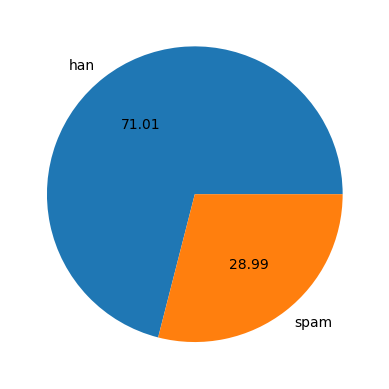

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=["han","spam"],autopct="%0.2f")
plt.show()

In [ ]:
import nltk
from nltk import *

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters']=df['text'].apply(len)

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num,num_characters
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336


In [ ]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num,num_characters,num_words
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [ ]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,Unnamed: 0,label,text,label_num,num_characters,num_words,num_sentences
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5171.000000,5171.000000,5171.000000
mean,1048.391994,229.181009,13.121253
std,1528.513435,336.487397,27.541637
min,11.000000,2.000000,1.000000
25%,244.000000,52.000000,4.000000
50%,540.000000,122.000000,7.000000
75%,1237.000000,283.500000,15.000000
max,32258.000000,8863.000000,1204.000000


In [ ]:
#ham
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3672.000000,3672.000000,3672.000000
mean,977.008170,226.239107,11.440904
std,1382.827493,332.179661,24.892442
min,18.000000,3.000000,1.000000
25%,231.750000,51.000000,3.000000
50%,530.000000,124.000000,6.000000
75%,1227.250000,294.000000,13.000000
max,32258.000000,8863.000000,1204.000000


In [ ]:
#spam
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1499.000000,1499.000000,1499.000000
mean,1223.256171,236.387592,17.237492
std,1825.986210,346.821249,32.796043
min,11.000000,2.000000,1.000000
25%,283.000000,55.000000,4.000000
50%,576.000000,116.000000,9.000000
75%,1253.500000,244.000000,18.500000
max,22073.000000,3963.000000,693.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

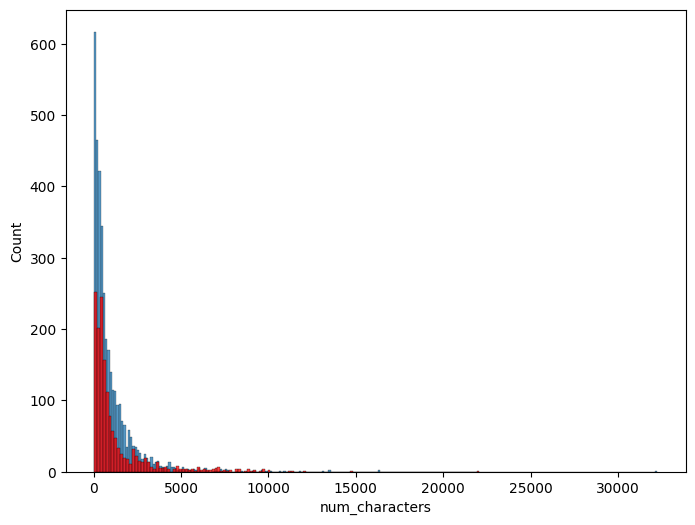

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['label']==0]['num_characters'])
sns.histplot(df[df['label']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

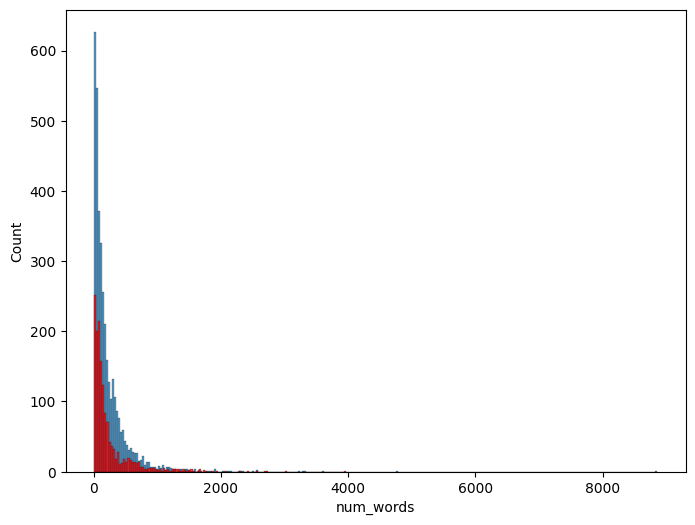

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['label']==0]['num_words'])
sns.histplot(df[df['label']==1]['num_words'],color='red')

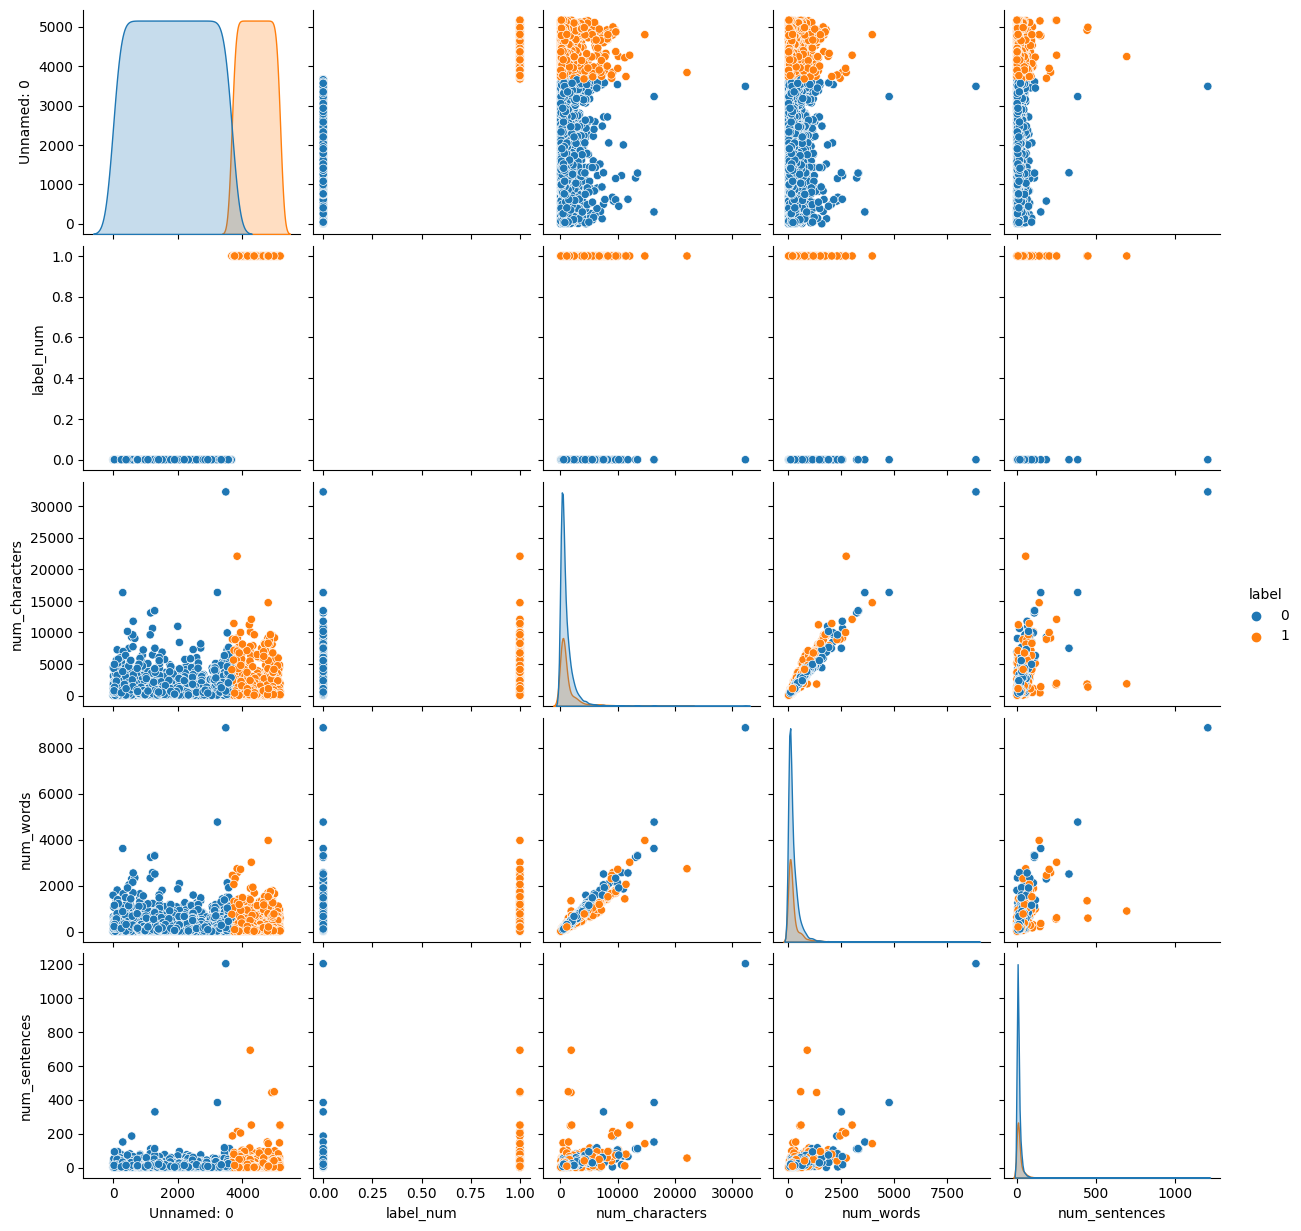

In [ ]:
sns.pairplot(df,hue='label')

<Axes: >

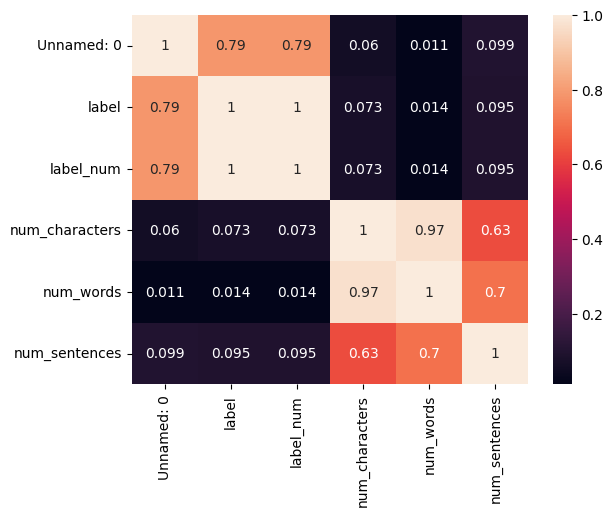

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
 def transform_text(text):
   text=text.lower()
   text=nltk.word_tokenize(text)
   y=[]
   for i in text:
     if i.isalnum():
       y.append(i)
    
   text = y[:]
   y.clear()
   for i in text:
     if i not in stopwords.words('english') and i not in string.punctuation:
       y.append(i)
   
   text = y[:]
   y.clear()
   for i in text:
      y.append(ps.stem(i))
    
            
   return " ".join(y)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
transform_text('Hi how Are 20% you')

'hi 20'

In [ ]:
df['text'][2000]

"Subject: mobil chemical - hpl meter # 1256 - expense transport\r\ned - can you help ? i need to know the term of our existing transport expense\r\ndeal with reliant entex to serve the referenced customer . we must have an\r\nexisting contract that we can look up . our existing deal to sell to mobil\r\nexpires october 1 . i am trying to make a two year sales offer beginning\r\noctober 1 . if the transport expires before then , then we ' ll need to call\r\nentex about a transport rate . who is the correct dealmaker to call entex on\r\nthis matter ? ? i ' d be happy to do it , but i ' d be stepping on somebody else ' s\r\nturf .\r\nif the existing rate is indeed 5 cents plus 2 . 02 % fuel , that seems kind of\r\nhigh . it ' s a short haul - according to our field folk , we give the gas to\r\nentex at the la porte city gate , and it goes to the mobil plant at pasadena ,\r\nabout 10 miles away at the most .\r\nany and all help appreciated .\r\nlee\r\nenron north america corp .\r\nfrom : pa

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'